# Starter

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Python - Time Series Forecasting/Time Series Analysis/CAPSTONE PROJECT - Airmiles

/content/drive/MyDrive/Python - Time Series Forecasting/Time Series Analysis/CAPSTONE PROJECT - Airmiles


In [3]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [4]:
# Load the Airmiles data and set the Date as index
df = pd.read_csv("airmiles.csv",
                 index_col = "Date",
                 parse_dates = True,
                 dayfirst = True)
df.head()

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


In [5]:
# Information about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113 entries, 1996-01-01 to 2005-05-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   airmiles  113 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


In [6]:
# Rename the Y variable
df = df.rename(columns={'airmiles': 'y'})
df.head()

,y
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


# Task 1

In [7]:
# Set index to monthly frequency MS
df = df.asfreq('MS')
df.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2004-08-01', '2004-09-01', '2004-10-01', '2004-11-01',
               '2004-12-01', '2005-01-01', '2005-02-01', '2005-03-01',
               '2005-04-01', '2005-05-01'],
              dtype='datetime64[ns]', name='Date', length=113, freq='MS')

# Task 2 - Data Viz + EDA

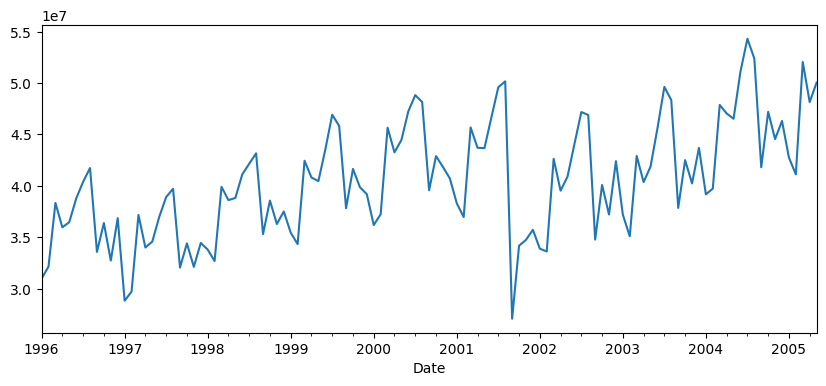

In [9]:
# Simple Time series plot
df.y.plot(figsize = (10, 4))
plt.show()

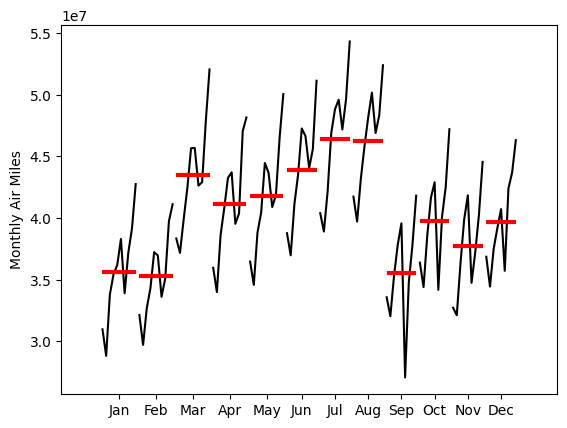

In [10]:
# Build the month_plot
month_plot(df.y, ylabel = "Monthly Air Miles")
plt.show()

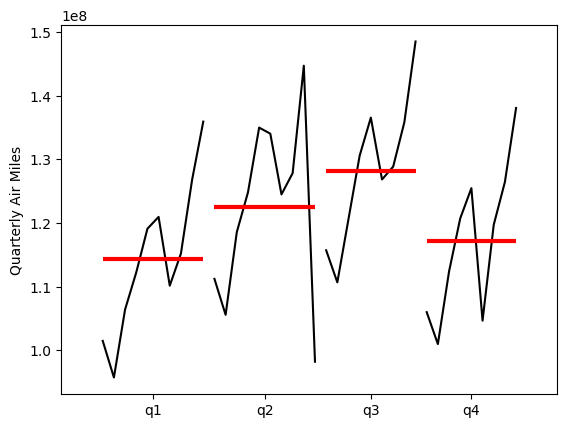

In [15]:
# Build the quarter plot
quarter_plot(df.y.resample("QE").sum(), ylabel = "Quarterly Air Miles")
plt.show()

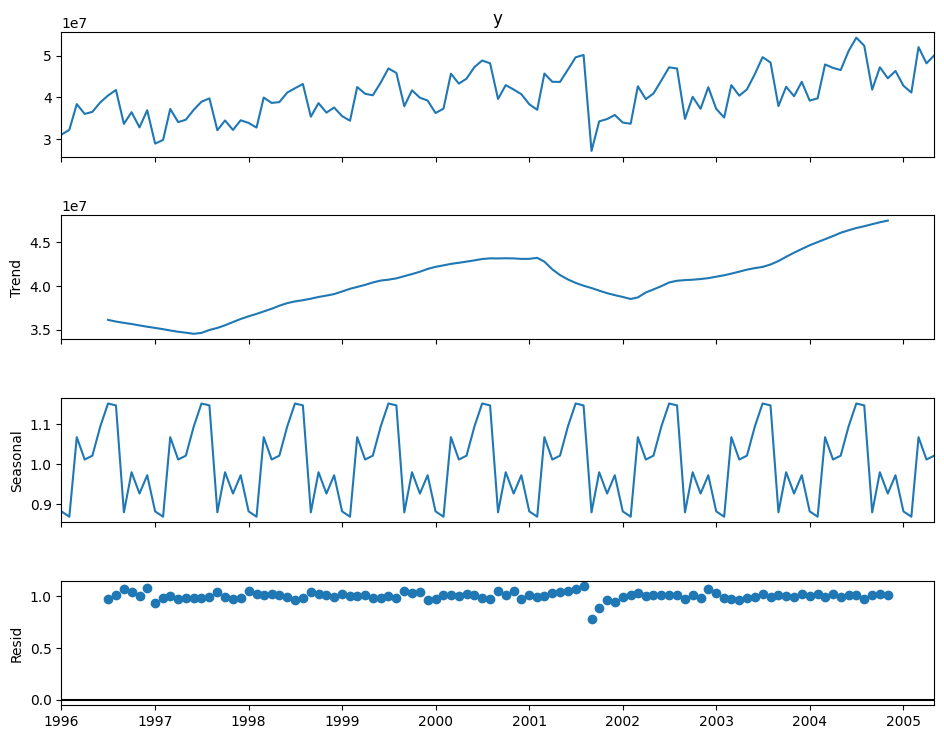

In [19]:
# Perform the Seasonal Decomposition
decomp = seasonal_decompose(df.y,
                            period = 12,
                            model = "mul")
fig = decomp.plot()
fig.set_size_inches(10, 8)
plt.show()

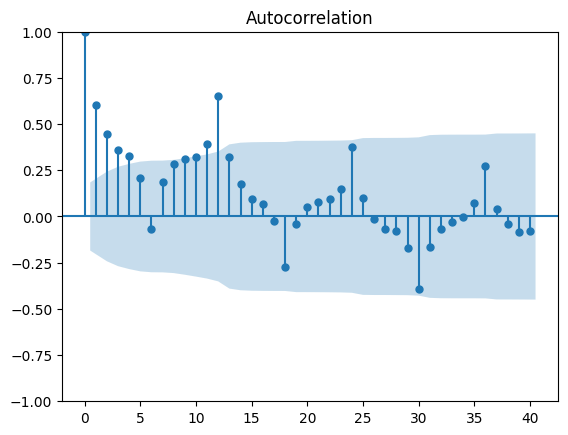

In [20]:
# Perform the Auto Correlation Plot
plot_acf(df.y, lags = 40)
plt.show()

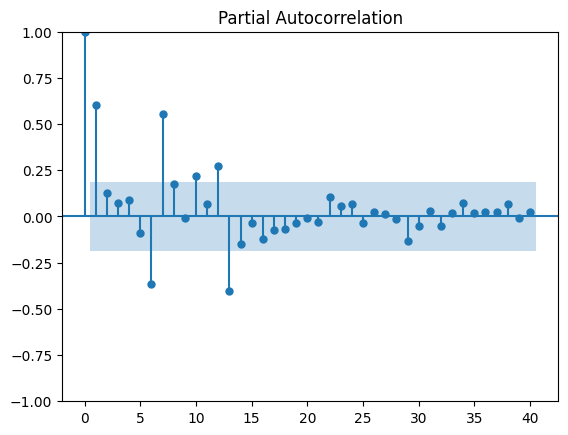

In [21]:
# Perform the PACF
plot_pacf(df.y, lags = 40)
plt.show()

# Task 3 - Training and Test Set

In [22]:
# Set the test set to be the last 12 months
df_train = df.iloc[:-12]
df_test = df.iloc[-12:]

# Task 4- Holt-Winters

In [23]:
# Build the Holt-Winters Model
model = ExponentialSmoothing(
    df_train.y,
    trend = "add",
    seasonal = "mul",
    seasonal_periods = 12).fit()

# Task 5- Forecasting

In [24]:
# Predict 12 periods with the model
predictions = model.forecast(steps = len(df_test)).rename("Holt-Winters")
predictions

,Holt-Winters
2004-06-01,5.010391e+07
2004-07-01,5.302285e+07
2004-08-01,5.304613e+07
2004-09-01,4.022381e+07
2004-10-01,4.509546e+07
2004-11-01,4.279716e+07
2004-12-01,4.494542e+07
2005-01-01,4.081431e+07
2005-02-01,4.045600e+07
2005-03-01,4.972900e+07


# Task 6 - Accurary Assessment

In [26]:
# Assess the model with the MAE, MAPE, and RMSE
mae = mean_absolute_error(df_test.y, predictions)
mape = mean_absolute_percentage_error(df_test.y, predictions)
rmse = root_mean_squared_error(df_test.y, predictions)

# Display to the user
print(f"The MAE is {mae:.2f}")
print(f"The MAPE is {mape:.4f}")
print(f"The RMSE is {rmse:.2f}")
#

The MAE is 1489381.92
The MAPE is 0.0315
The RMSE is 1595615.01


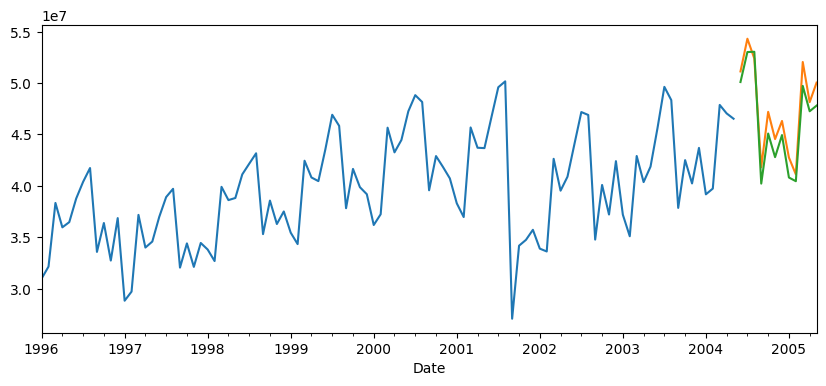

In [27]:
# Visualize the training, test and predictions data
df_train.y.plot(figsize = (10, 4))
df_test.y.plot()
predictions.plot()
plt.show()
#

# Bonus Task - Predict the Future

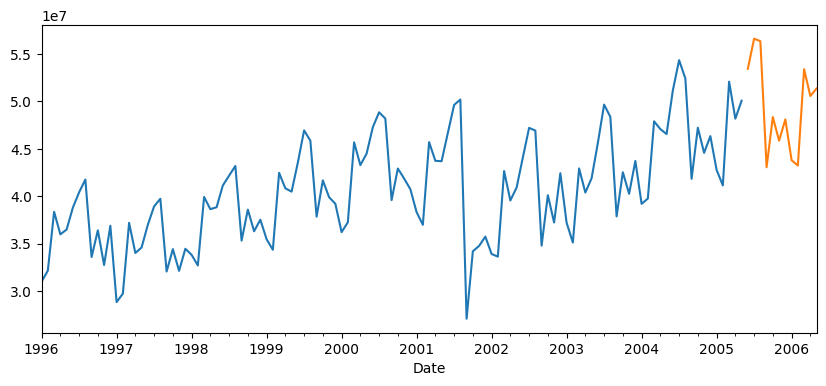

In [28]:
# build a holt winters model with the complete data
model_complete = ExponentialSmoothing(
    df.y,
    trend = "add",
    seasonal = "mul",
    seasonal_periods = 12).fit()

# Predict the next 12 months
future_predictions = model_complete.forecast(steps = 12).rename("Holt-Winters")

# Visualize training and future predictions
df.y.plot(figsize = (10, 4))
future_predictions.plot()
plt.show()
